In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
from utils import get_third_friday

eff_date = get_third_friday(2025, 9)
print(eff_date)
ref_date = (eff_date - pd.offsets.Day(5*7)).date()
print(ref_date)

prev_eff_date = get_third_friday(2024, 9)
print(prev_eff_date)
prev_ref_date = (prev_eff_date - pd.offsets.Day(5*7)).date()
print(prev_ref_date)

pprev_eff_date = get_third_friday(2023, 9)
print(pprev_eff_date)
pprev_ref_date = (pprev_eff_date - pd.offsets.Day(5*7)).date()
print(pprev_ref_date)

2025-09-19
2025-08-15
2024-09-20
2024-08-16
2023-09-15
2023-08-11


In [3]:
from data_constitutents import consolidate_data, get_wiki_data
sp_df = consolidate_data()
sp_df.head()

1506 records of the S&P 1500 index constituents are found in the Wikipedia page.
10 records of the S&P 1500 index constituents are not found in the EDGAR database.
6 records of the S&P 1500 index constituents are with duplicate CIK
1500 records of the S&P 1500 index constituents are mapped with the EDGAR database.


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,Founded,index_series,cik,name,ticker,exchange
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04 00:00:00,1902,500,0000066740,3M CO,MMM,NYSE
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26 00:00:00,1916,500,0000091142,SMITH A O CORP,AOS,NYSE
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04 00:00:00,1888,500,0000001800,ABBOTT LABORATORIES,ABT,NYSE
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31 00:00:00,2013 (1888),500,0001551152,AbbVie Inc.,ABBV,NYSE
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06 00:00:00,1989,500,0001467373,Accenture plc,ACN,NYSE


In [4]:
get_wiki_data("changes")

,Date,Added_Ticker,Added_Security,Removed_Ticker,Removed_Security,Reason,index_series
0,2025-03-24,DASH,DoorDash,BWA,BorgWarner,Market capitalization change.[4],500
1,2025-03-24,TKO,TKO Group Holdings,TFX,Teleflex,Market capitalization change.[4],500
2,2025-03-24,WSM,"Williams-Sonoma, Inc.",CE,Celanese,Market capitalization change.[4],500
3,2025-03-24,EXE,Expand Energy,FMC,FMC Corporation,Market capitalization change.[4],500
4,2024-12-23,APO,Apollo Global Management,QRVO,Qorvo,Market capitalization change.[5],500
...,...,...,...,...,...,...,...
1212,2020-01-02,FBM,Foundation Building Materials,RH,RH,FBM replaced RH which was no longer representa...,600
1213,2019-12-23,UNIT,Uniti Group,CRZO,Carrizo Oil & Gas,UNIT replaced CRZO as Carrizo Oil & Gas was ac...,600
1214,2019-12-23,OAS,Oasis Petroleum,UNIT,Unit Corp,OAS replaced UNIT which was no longer represen...,600
1215,2019-12-23,SWN,Southwestern Energy,FTR,Frontier Communications,SWN replaced FTR which was no longer represent...,600


In [5]:
from data_api import EdgarAPI
meta_data = []
for cik in sp_df["cik"].unique():
    edgar_api = EdgarAPI(retrieval="submission", cik=cik)
    metadata = edgar_api.get_company_meta()
    meta_data.append(metadata)
meta_df = pd.DataFrame(meta_data)

In [6]:
sp_df = sp_df.merge(meta_df.drop(columns=["name"]), on=["cik"], how="left")
sp_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,Founded,index_series,cik,name,...,exchanges,ein,lei,description,fiscalYearEnd,website,investorWebsite,category,stateOfIncorporation,stateOfIncorporationDescription
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04 00:00:00,1902,500,0000066740,3M CO,...,NYSE,410417775,,,1231,,,Large accelerated filer,DE,DE
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26 00:00:00,1916,500,0000091142,SMITH A O CORP,...,NYSE,390619790,,,1231,,,Large accelerated filer,DE,DE
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04 00:00:00,1888,500,0000001800,ABBOTT LABORATORIES,...,NYSE,360698440,,,1231,,,Large accelerated filer,IL,IL
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31 00:00:00,2013 (1888),500,0001551152,AbbVie Inc.,...,NYSE,320375147,,,1231,,,Large accelerated filer,DE,DE
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06 00:00:00,1989,500,0001467373,Accenture plc,...,NYSE,980627530,,,0831,,,Large accelerated filer,L2,Ireland


#### Proxy (DEF 14A)

In [ ]:
proxy_df = pd.DataFrame()
for cik in sp_df["cik"].unique():
    edgar_api = EdgarAPI(retrieval="submission", cik=cik)
    filings = edgar_api.get_company_filings(filing_type=["DEF 14A"])

    filings["annualReview"] = np.where(
        filings["filingDate"].between(str(pprev_ref_date), str(prev_ref_date)), "prev",
        np.where(filings["filingDate"].between(str(prev_ref_date), str(ref_date)), "curr", None))
    filings = filings[filings["annualReview"].notnull()][["cik", "accessionNumber", "filingDate", "reportDate", "primaryDocument", "annualReview", "form"]]
    filings.columns = ["cik"] + [f"proxy_{col}" for col in filings.columns[1:]]
    proxy_df = pd.concat([proxy_df, filings], ignore_index=True)

proxy_df = proxy_df.merge(sp_df[["cik", "name", "ticker", "index_series", "fiscalYearEnd"]], on=["cik"], how="left")
proxy_df["proxy_filingMonth"] = pd.to_datetime(proxy_df["proxy_filingDate"]).dt.month
proxy_df.shape

(2167, 12)

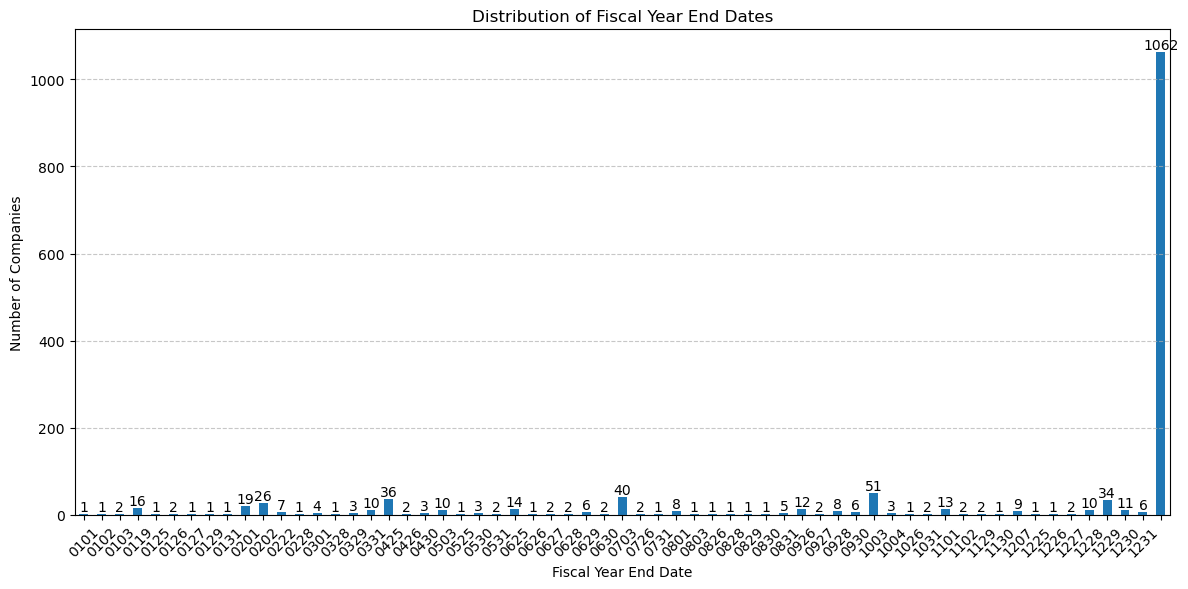

In [43]:
# Create bar plot for fiscal year end distribution
plt.figure(figsize=(12, 6))

# Get value counts and sort by index
fiscal_year_counts = proxy_df[proxy_df["proxy_annualReview"] == "prev"]["fiscalYearEnd"].value_counts().sort_index()

# Create bar plot
ax = fiscal_year_counts.plot(kind="bar")

# Customize the plot
plt.title('Distribution of Fiscal Year End Dates')
plt.xlabel('Fiscal Year End Date')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(fiscal_year_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [39]:
pd.to_datetime(proxy_df[proxy_df["proxy_annualReview"] == "prev"]["proxy_filingDate"]).describe(percentiles=[.25, .5, .75, .9, .95, .99])

count                             1481
mean     2024-03-21 08:11:01.174882048
min                2023-08-11 00:00:00
25%                2024-03-15 00:00:00
50%                2024-04-01 00:00:00
75%                2024-04-17 00:00:00
90%                2024-04-29 00:00:00
95%                2024-06-11 00:00:00
99%                2024-08-01 04:48:00
max                2024-08-16 00:00:00
Name: proxy_filingDate, dtype: object

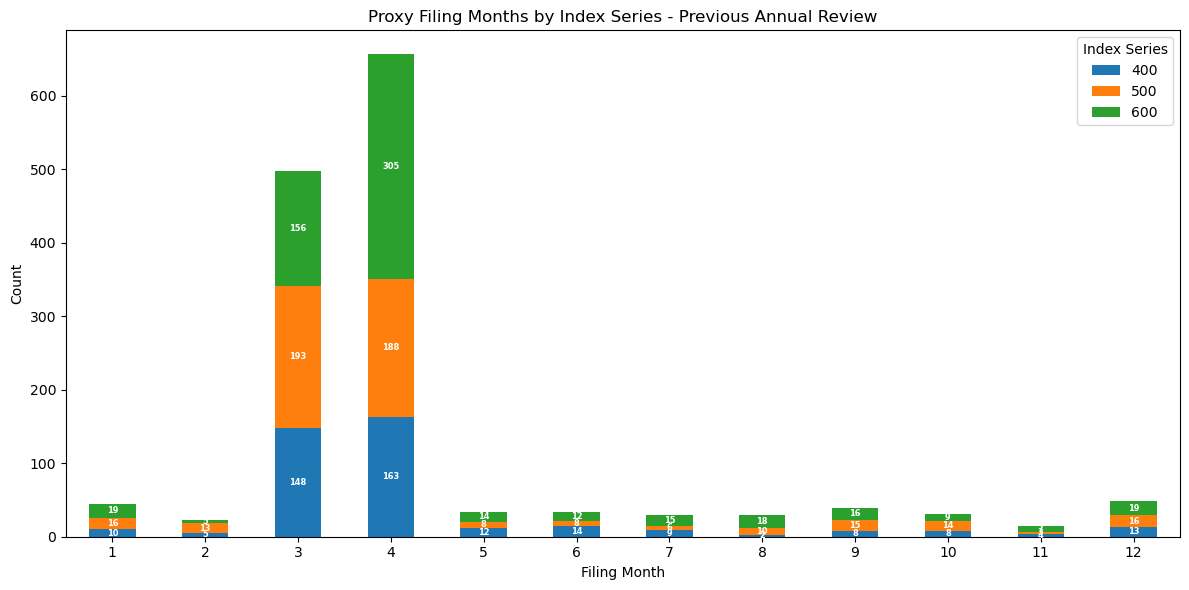

In [47]:
import matplotlib.pyplot as plt
# Create a grouped stacked bar chart
proxy_grouped = proxy_df[proxy_df["proxy_annualReview"] == "prev"].groupby(['proxy_filingMonth', 'index_series']).size().unstack()

# Plot stacked bar chart
ax = proxy_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
# Get the bars from the plot
bars = ax.containers
# Add value labels on the bars
for container in bars:
    ax.bar_label(container, label_type='center', size=6, padding=0, color='white', weight='bold')
# Customize the plot
plt.title('Proxy Filing Months by Index Series - Previous Annual Review')
plt.xlabel('Filing Month')
plt.ylabel('Count')
plt.legend(title='Index Series')
plt.xticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()